## OpenCV Object Detection in Games
In this tutorial you will learn how to:

* Use the OpenCV function matchTemplate() to search for matches between an image patch and an input image
* Use the OpenCV function minMaxLoc() to find the maximum and minimum values (as well as their positions) in a given array.

In [1]:
# !pip install opencv-python
# !pip install pyautogui

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


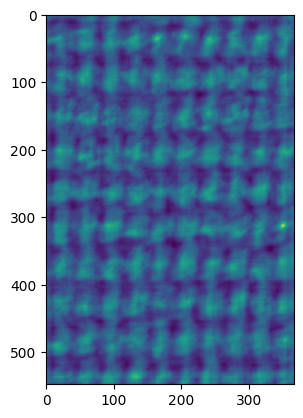

In [3]:
pokemon = cv.imread("./assets/pokemon.jpg",cv.IMREAD_UNCHANGED)
pokemon_target = cv.imread("./assets/pokemon_target.jpg",cv.IMREAD_UNCHANGED)

result = cv.matchTemplate(pokemon,pokemon_target,cv.TM_CCOEFF_NORMED)   ## usually it gives the best result
# cv.imshow("Result",result) # White is most possible area, Black is most impossible area
# cv.waitKey()

plt.imshow(result)
plt.show()

In [4]:
# get the best match position
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(result)
print(f"Best match top left position: {max_loc}")
print(f"Best match confidence: {max_val}")

Best match top left position: (350, 313)
Best match confidence: 0.9823356866836548


Found it!


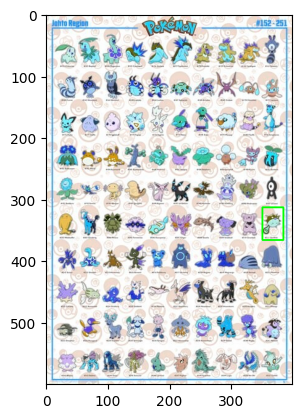

In [5]:
# add threshold to filter the result
threshold = 0.3
if max_val >= threshold:
    print("Found it!")
    # get dimensions of the target
    target_w = pokemon_target.shape[1]
    target_h = pokemon_target.shape[0]

    top_left = max_loc
    bottom_right = (top_left[0] + target_w, top_left[1] + target_h)
    # Draw a red rectangle on it
    cv.rectangle(pokemon,top_left, bottom_right,
                 color=(0,255,0),thickness=2,lineType=cv.LINE_4)
    plt.imshow(pokemon)
    plt.show()
    # cv.imshow("Result",pokemon)
    # cv.waitKey()
else:
    print("Do not find it.")

### Try all 3 methods

In [6]:
method_lst = [cv.TM_SQDIFF_NORMED,cv.TM_CCOEFF_NORMED,cv.TM_CCOEFF_NORMED]

best_idx = -1
current_max = -1

for i,method in enumerate(method_lst):
    pokemon = cv.imread("./assets/pokemon.jpg",cv.IMREAD_UNCHANGED)
    pokemon_target = cv.imread("./assets/pokemon_target.jpg",cv.IMREAD_UNCHANGED)
    temp_result = cv.matchTemplate(pokemon,pokemon_target,method) 
    min_val,max_val,min_loc,max_loc = cv.minMaxLoc(temp_result)
    if(current_max < max_val):
        current_max = max_val
        best_idx = i
        result = temp_result

best_idx,current_max

(1, 0.9823356866836548)

Found it!


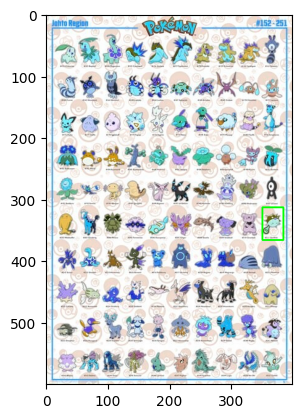

In [7]:
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(result)
# add threshold to filter the result
threshold = 0.3
if max_val >= threshold:
    print("Found it!")
    # get dimensions of the target
    target_w = pokemon_target.shape[1]
    target_h = pokemon_target.shape[0]

    top_left = max_loc
    bottom_right = (top_left[0] + target_w, top_left[1] + target_h)
    # Draw a red rectangle on it
    cv.rectangle(pokemon,top_left, bottom_right,
                 color=(0,255,0),thickness=2,lineType=cv.LINE_4)
    plt.imshow(pokemon)
    plt.show()
    # cv.imshow("Result",pokemon)
    # cv.waitKey()
else:
    print("Do not find it.")

## Match mutiple Objects
* Previously we used `minMaxLoc()` to get the best matching position for our needle image, but `matchTemplate()` actually returns a result matrix for all the positions it searched.

* Each value in this matrix represents the **confidence score** for how closely the target image matches the pokemon image at a given position. The index of the outer dimension represents the Y position, and the index of the inner list represent the X position. 

In [8]:
## allow more digits of print
import sys
np.set_printoptions(threshold=sys.maxsize)  ## careful for large size data
print(result[0][:5])  # confidence value of x=1 to 5 when y=0

[0.24816084 0.25986704 0.27480596 0.28265956 0.27283692]


In [9]:
### get all value greater than threshold
mario = cv.imread("./assets/mario.jpg",cv.IMREAD_UNCHANGED)
coin = cv.imread("./assets/coin.jpg",cv.IMREAD_UNCHANGED)

result = cv.matchTemplate(mario,coin,cv.TM_CCOEFF_NORMED)   ## usually it gives the best result
# result = cv.matchTemplate(mario,coin,cv.TM_SQDIFF_NORMED)   ## usually it gives the best result

threshold = 0.6

locations = np.where(result >= threshold)
print(locations)

(array([178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 179, 180, 180,
       180, 180, 180, 180, 180, 181, 181, 181, 181, 181, 181, 181, 182,
       182, 182, 182, 182, 182, 183, 183, 183, 183, 184, 184, 184, 184,
       185, 185, 185, 185, 186, 186, 186, 187, 187], dtype=int64), array([102, 103, 104, 235, 236, 102, 103, 104, 234, 235, 236, 102, 103,
       104, 234, 235, 236, 237, 102, 103, 104, 234, 235, 236, 237, 102,
       103, 104, 234, 235, 236, 103, 104, 235, 236, 103, 104, 235, 236,
       103, 104, 235, 236, 103, 235, 236, 103, 235], dtype=int64))


In [10]:
### We can zip those up into position tuples
locations = list(zip(*locations[::-1]))
print(locations)

[(102, 178), (103, 178), (104, 178), (235, 178), (236, 178), (102, 179), (103, 179), (104, 179), (234, 179), (235, 179), (236, 179), (102, 180), (103, 180), (104, 180), (234, 180), (235, 180), (236, 180), (237, 180), (102, 181), (103, 181), (104, 181), (234, 181), (235, 181), (236, 181), (237, 181), (102, 182), (103, 182), (104, 182), (234, 182), (235, 182), (236, 182), (103, 183), (104, 183), (235, 183), (236, 183), (103, 184), (104, 184), (235, 184), (236, 184), (103, 185), (104, 185), (235, 185), (236, 185), (103, 186), (235, 186), (236, 186), (103, 187), (235, 187)]


Found it


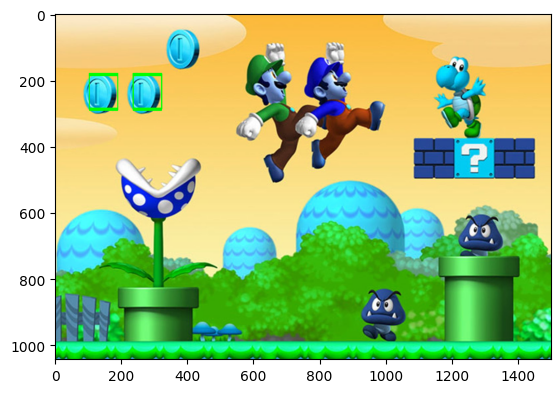

In [11]:
if locations:
    print("Found it")

    target_h = coin.shape[0]
    target_w = coin.shape[1]
    line_color = (0,255,0) #red
    line_type = cv.LINE_4

    # need to loop over all the locations and draw their rectangle
    for loc in locations:
        # determine the box positions
        top_left = loc
        bottom_right = (top_left[0] + target_w, top_left[1] + target_h)
        cv.rectangle(mario,top_left,bottom_right,line_color,lineType=line_type)

    plt.imshow(mario)
    plt.show()
    # cv.imshow("Matches",mario)
    # cv.waitKey()

else:
    print("Do not find it!")

### Use difference method to find it

Found it


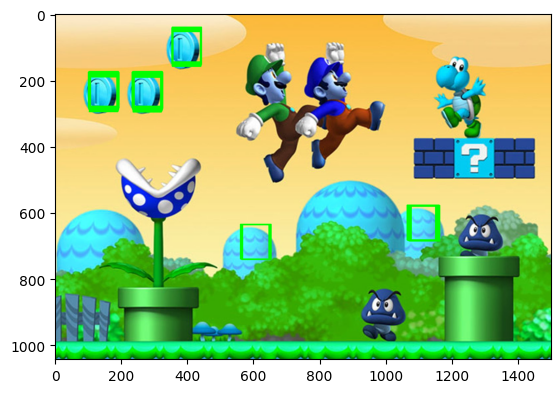

In [12]:
### get all value greater than threshold
mario = cv.imread("./assets/mario.jpg",cv.IMREAD_UNCHANGED)
coin = cv.imread("./assets/coin.jpg",cv.IMREAD_UNCHANGED)
result = cv.matchTemplate(mario,coin,cv.TM_SQDIFF_NORMED)   ## usually it gives the best result
threshold = 0.15
locations = np.where(result <= threshold)
locations = list(zip(*locations[::-1]))

if locations:
    print("Found it")

    target_h = coin.shape[0]
    target_w = coin.shape[1]
    line_color = (0,255,0) #red
    line_type = cv.LINE_4

    # need to loop over all the locations and draw their rectangle
    for loc in locations:
        # determine the box positions
        top_left = loc
        bottom_right = (top_left[0] + target_w, top_left[1] + target_h)
        cv.rectangle(mario,top_left,bottom_right,line_color,lineType=line_type)

    plt.imshow(mario)
    plt.show()
    # cv.imshow("Matches",mario)
    # cv.waitKey()

else:
    print("Do not find it!")